# Lab 3: Gesture Recognition using Convolutional Neural Networks

**Deadlines**: 

- Lab 3 Part A: Oct 15, 11:59pm
- Lab 3 Part B: Oct 22, 11:59pm

**Late Penalty**: There is a penalty-free grace period of one hour past the deadline. Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**Grading TAs**: 
- Lab 3 Part A: Geoff Donoghue  
- Lab 3 Part B: Geoff Donoghue

This lab is based on an assignment developed by Prof. Lisa Zhang.

This lab will be completed in two parts. In Part A you will you will gain experience gathering your own data set (specifically images of hand gestures), and understand the challenges involved in the data cleaning process. In Part B you will train a convolutional neural network to make classifications on different hand gestures. By the end of the lab, you should be able to:

1. Generate and preprocess your own data
2. Load and split data for training, validation and testing
3. Train a Convolutional Neural Network
4. Apply transfer learning to improve your model

Note that for this lab we will not be providing you with any starter code. You should be able to take the code used in previous labs, tutorials and lectures and modify it accordingly to complete the tasks outlined below.

### What to submit

**Submission for Part A:**  
Submit a zip file containing your images. Three images each of American Sign Language gestures for letters A - I (total of 27 images). You will be required to clean the images before submitting them. Details are provided under Part A of the handout.

Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg).


**Submission for Part B:**  
Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information. Make sure to review the PDF submission to ensure that your answers are easy to read. Make sure that your text is not cut off at the margins. 

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

## Colab Link

Include a link to your colab file here

Colab Link: https://colab.research.google.com/drive/1mTHU07VKwhM-LiherjUCk6B5tsQJQ1wx?authuser=1#scrollTo=2dtx1z5951fS

## Part A. Data Collection [10 pt]

So far, we have worked with data sets that have been collected, cleaned, and curated by machine learning
researchers and practitioners. Datasets like MNIST and CIFAR are often used as toy examples, both by
students and by researchers testing new machine learning models.

In the real world, getting a clean data set is never that easy. More than half the work in applying machine
learning is finding, gathering, cleaning, and formatting your data set.

The purpose of this lab is to help you gain experience gathering your own data set, and understand the
challenges involved in the data cleaning process.

### American Sign Language

American Sign Language (ASL) is a complete, complex language that employs signs made by moving the
hands combined with facial expressions and postures of the body. It is the primary language of many
North Americans who are deaf and is one of several communication options used by people who are deaf or
hard-of-hearing.

The hand gestures representing English alphabet are shown below. This lab focuses on classifying a subset
of these hand gesture images using convolutional neural networks. Specifically, given an image of a hand
showing one of the letters A-I, we want to detect which letter is being represented.

![alt text](https://www.disabled-world.com/pics/1/asl-alphabet.jpg)


### Generating Data
We will produce the images required for this lab by ourselves. Each student will collect, clean and submit
three images each of Americal Sign Language gestures for letters A - I (total of 27 images)
Steps involved in data collection

1. Familiarize yourself with American Sign Language gestures for letters from A - I (9 letters).
2. Take three pictures at slightly different orientation for each letter gesture using your
mobile phone.
 - Ensure adequate lighting while you are capturing the images.
 - Use a white wall as your background.
 - Use your right hand to create gestures (for consistency).
 - Keep your right hand fairly apart from your body and any other obstructions.
 - Avoid having shadows on parts of your hand.
3. Transfer the images to your laptop for cleaning.

### Cleaning Data
To simplify the machine learning the task, we will standardize the training images. We will make sure that
all our images are of the same size (224 x 224 pixels RGB), and have the hand in the center of the cropped
regions.

You may use the following applications to crop and resize your images:

**Mac**
- Use Preview:
– Holding down CMD + Shift will keep a square aspect ratio while selecting the hand area.
– Resize to 224x224 pixels.

**Windows 10**
- Use Photos app to edit and crop the image and keep the aspect ratio a square.
- Use Paint to resize the image to the final image size of 224x224 pixels.

**Linux**
- You can use GIMP, imagemagick, or other tools of your choosing.
You may also use online tools such as http://picresize.com
All the above steps are illustrative only. You need not follow these steps but following these will ensure that
you produce a good quality dataset. You will be judged based on the quality of the images alone.
Please do not edit your photos in any other way. You should not need to change the aspect ratio of your
image. You also should not digitally remove the background or shadows—instead, take photos with a white
background and minimal shadows.

### Accepted Images
Images will be accepted and graded based on the criteria below
1. The final image should be size 224x224 pixels (RGB).
2. The file format should be a .jpg file.
3. The hand should be approximately centered on the frame.
4. The hand should not be obscured or cut off.
5. The photos follows the ASL gestures posted earlier.
6. The photos were not edited in any other way (e.g. no electronic removal of shadows or background).

### Submission
Submit a zip file containing your images. There should be a total of 27 images (3 for each category)
1. Individual image file names should follow the convention of student-number_Alphabet_file-number.jpg
(e.g. 100343434_A_1.jpg)
2. Zip all the images together and name it with the following convention: last-name_student-number.zip
(e.g. last-name_100343434.zip).
3. Submit the zipped folder.
We will be anonymizing and combining the images that everyone submits. We will announce when the
combined data set will be available for download.

![alt text](https://github.com/UTNeural/APS360/blob/master/Gesture%20Images.PNG?raw=true)

## Part B. Building a CNN [50 pt]

For this lab, we are not going to give you any starter code. You will be writing a convolutional neural network
from scratch. You are welcome to use any code from previous labs, lectures and tutorials. You should also
write your own code.

You may use the PyTorch documentation freely. You might also find online tutorials helpful. However, all
code that you submit must be your own.

Make sure that your code is vectorized, and does not contain obvious inefficiencies (for example, unecessary
for loops, or unnecessary calls to unsqueeze()). Ensure enough comments are included in the code so that
your TA can understand what you are doing. It is your responsibility to show that you understand what you
write.

**This is much more challenging and time-consuming than the previous labs.** Make sure that you
give yourself plenty of time by starting early.

In [ ]:
import numpy as np
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data.sampler import SubsetRandomSampler
import torchvision.transforms as transforms
import time
import os
import numpy as np

import torchvision
from torchvision import datasets, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Data Loading and Splitting [5 pt]

Download the anonymized data provided on Quercus. To allow you to get a heads start on this project we will provide you with sample data from previous years. Split the data into training, validation, and test sets.

Note: Data splitting is not as trivial in this lab. We want our test set to closely resemble the setting in which
our model will be used. In particular, our test set should contain hands that are never seen in training!

Explain how you split the data, either by describing what you did, or by showing the code that you used.
Justify your choice of splitting strategy. How many training, validation, and test images do you have?

For loading the data, you can use plt.imread as in Lab 1, or any other method that you choose. You may find
torchvision.datasets.ImageFolder helpful. (see https://pytorch.org/docs/stable/torchvision/datasets.html?highlight=image%20folder#torchvision.datasets.ImageFolder
) 

In [ ]:
# location on Google Drive
master_path = '/content/drive/My Drive/EngSci Year3/APS360/Labs/Lab 3/'

# Transform Settings - Do not use RandomResizedCrop
transform = transforms.Compose([transforms.Resize((224,224)), 
                                transforms.ToTensor()])

# Load data from Google Drive
train_data = torchvision.datasets.ImageFolder(master_path + 'Lab_3b_Gesture_Dataset_Training', transform=transform)
val_data = torchvision.datasets.ImageFolder(master_path + 'Lab_3b_Gesture_Dataset_Validation', transform=transform)
test_data = torchvision.datasets.ImageFolder(master_path + 'Lab_3b_Gesture_Dataset_Testing', transform=transform)
overfit_data = torchvision.datasets.ImageFolder(master_path + 'Lab_3b_Gesture_Dataset_Overfit', transform=transform)

train_loader = torch.utils.data.DataLoader(train_data, batch_size=27, num_workers=4 , 
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=27, num_workers=4, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=27, num_workers=4 , 
                                           shuffle=True)
overfit_loader = torch.utils.data.DataLoader(overfit_data, batch_size=27, num_workers=4 , 
                                           shuffle=True)


### 2. Model Building and Sanity Checking [15 pt]

### Part (a) Convolutional Network - 5 pt

Build a convolutional neural network model that takes the (224x224 RGB) image as input, and predicts the gesture
letter. Your model should be a subclass of nn.Module. Explain your choice of neural network architecture: how
many layers did you choose? What types of layers did you use? Were they fully-connected or convolutional?
What about other decisions like pooling layers, activation functions, number of channels / hidden units?

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt 
import torch.optim as optim

torch.manual_seed(1) 

class CNNClassifier(nn.Module):
    def __init__(self):

        super(CNNClassifier, self).__init__()
        self.name = "model"
        self.conv1 = nn.Conv2d(3, 5, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 10, 5)
        self.fc1 = nn.Linear(10 * 53 * 53, 244)
        self.fc2 = nn.Linear(244, 9)

    def forward(self, img):
        x = self.pool(F.relu(self.conv1(img)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 10 * 53 * 53)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

Decided to use an architecture similar to what was presented in lecture. There are two convolutional layers and a pooling layer in between each, then two fully connected layers at the end, with a Relu activation function. 

### Part (b) Training Code - 5 pt

Write code that trains your neural network given some training data. Your training code should make it easy
to tweak the usual hyperparameters, like batch size, learning rate, and the model object itself. Make sure
that you are checkpointing your models from time to time (the frequency is up to you). Explain your choice
of loss function and optimizer.

In [ ]:
def train(model, train_loader, val_loader, batch_size=27, num_epochs=1, learn_rate = 0.001):

    torch.manual_seed(1000)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    # Array to hold error and loss
    train_err = np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_err = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    # Start Training 
    print ("Training Started...")
    n = 0 # Iteration number
    for epoch in range(num_epochs):
        total_train_loss = 0.0
        for imgs, labels in iter(train_loader):

            if torch.cuda.is_available():
                imgs = imgs.cuda()
                labels = labels.cuda()

            out = model(imgs)                # forward pass
            loss = criterion(out, labels)    # compute the total loss
            loss.backward()                  # backward pass (compute parameter updates)
            optimizer.step()                 # make the updates for each parameter
            optimizer.zero_grad()            # a clean up step for PyTorch
            total_train_loss += loss.item()

        train_err[epoch] = get_error(model, train_loader)
        train_loss[epoch] = float(total_train_loss) / (len(train_loader))
        val_err[epoch] = get_error(model, val_loader)
        val_loss[epoch] = get_loss(model, val_loader, criterion)

        print(("Epoch {}: Train err: {}, Train loss: {} |"+
               "Validation err: {}, Validation loss: {}").format(
                   epoch + 1,
                   train_err[epoch],
                   train_loss[epoch],
                   val_err[epoch],
                   val_loss[epoch]))
        
        # Save the current model (checkpoint) to a file
        model_path = get_model_name(model.name, batch_size, learn_rate, epoch)
        torch.save(model.state_dict(), model_path)
    
    print('Finished Training')

    # Write the train/test loss/err into CSV file for plotting later

    epochs = np.arange(1, num_epochs + 1)

    np.savetxt("{}_train_err.csv".format(model_path), train_err)
    np.savetxt("{}_train_loss.csv".format(model_path), train_loss)
    np.savetxt("{}_val_err.csv".format(model_path), val_err)
    np.savetxt("{}_val_loss.csv".format(model_path), val_loss)

    plot_training_curve(model_path) 

    return True


def get_accuracy(model, data_loader):
    correct = 0
    total = 0

    for imgs, labels in data_loader:

        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        output = model(imgs)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]

    return correct / total

def get_error(model, data_loader):
    correct = 0
    total = 0
    eval_mod = model.eval()
    for imgs, labels in data_loader:

        if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()

        out = eval_mod(imgs)   
        #select index with maximum prediction score
        pred = out.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
    return (total-correct) / total

def get_loss(model, data_loader, criterion):
    loss = 0.0
    total_loss = 0.0
    eval_mod = model.eval()
    for imgs, labels in data_loader:

      if torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
  
      out = eval_mod(imgs)            
      loss = criterion(out, labels)
      total_loss += loss.item()

    loss = float(total_loss) / (len(data_loader))
    return loss


# Code from Lab 2 for plotting the training curve

def get_model_name(name, batch_size, learn_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learn_rate,
                                                   epoch)
    return path
    
def plot_training_curve(path):
    """ Plots the training curve for a model run, given the csv files
    containing the train/validation error/loss.

    Args:
        path: The base path of the csv files produced during training
    """
    import matplotlib.pyplot as plt
    train_err = np.loadtxt("{}_train_err.csv".format(path))
    val_err = np.loadtxt("{}_val_err.csv".format(path))
    train_loss = np.loadtxt("{}_train_loss.csv".format(path))
    val_loss = np.loadtxt("{}_val_loss.csv".format(path))
    plt.title("Train vs Validation Error")
    n = len(train_err) # number of epochs
    plt.plot(range(1,n+1), train_err, label="Train")
    plt.plot(range(1,n+1), val_err, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.legend(loc='best')
    plt.show()
    plt.title("Train vs Validation Loss")
    plt.plot(range(1,n+1), train_loss, label="Train")
    plt.plot(range(1,n+1), val_loss, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

Choice of loss function is Cross Entropy and optimizer was Adam. We've used these previously in lectures / labs and they've been proven to work, so it was a relatively easy choice. 

### Part (c) “Overfit” to a Small Dataset - 5 pt

One way to sanity check our neural network model and training code is to check whether the model is capable
of “overfitting” or “memorizing” a small dataset. A properly constructed CNN with correct training code
should be able to memorize the answers to a small number of images quickly.

Construct a small dataset (e.g. just the images that you have collected). Then show that your model and
training code is capable of memorizing the labels of this small data set.

With a large batch size (e.g. the entire small dataset) and learning rate that is not too high, You should be
able to obtain a 100% training accuracy on that small dataset relatively quickly (within 200 iterations).

Training Started...
Epoch 1: Train err: 0.8888888888888888, Train loss: 2.198395252227783 |Validation err: 0.8888888888888888, Validation loss: 2.103696346282959
Epoch 2: Train err: 0.5925925925925926, Train loss: 2.103696346282959 |Validation err: 0.5925925925925926, Validation loss: 2.0793697834014893
Epoch 3: Train err: 0.7407407407407407, Train loss: 2.07936954498291 |Validation err: 0.7407407407407407, Validation loss: 1.8556764125823975
Epoch 4: Train err: 0.48148148148148145, Train loss: 1.8556761741638184 |Validation err: 0.48148148148148145, Validation loss: 1.6201947927474976
Epoch 5: Train err: 0.2962962962962963, Train loss: 1.620194435119629 |Validation err: 0.2962962962962963, Validation loss: 1.394993543624878
Epoch 6: Train err: 0.0, Train loss: 1.3949934244155884 |Validation err: 0.0, Validation loss: 1.0728504657745361
Epoch 7: Train err: 0.2962962962962963, Train loss: 1.0728503465652466 |Validation err: 0.2962962962962963, Validation loss: 0.9294429421424866
Epoch 8

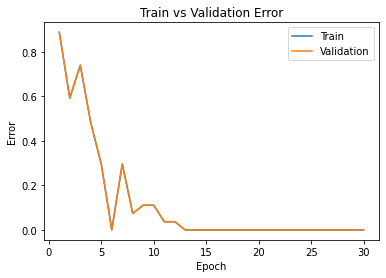

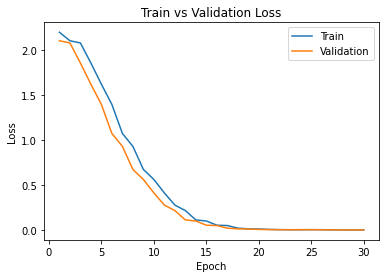

True

In [ ]:
model = CNNClassifier()
train(model, overfit_loader, overfit_loader, num_epochs=30, batch_size=27, learn_rate=0.001)

### 3. Hyperparameter Search [10 pt]

### Part (a) - 1 pt

List 3 hyperparameters that you think are most worth tuning. Choose at least one hyperparameter related to
the model architecture.

- **LEARNING RATE**


- **NUMBER OF LAYERS**


- **BATCH SIZE**



### Part (b) - 5 pt

Tune the hyperparameters you listed in Part (a), trying as many values as you need to until you feel satisfied
that you are getting a good model. Plot the training curve of at least 4 different hyperparameter settings.

Training Started...
Epoch 1: Train err: 0.8812729498164015, Train loss: 3.883439697203089 |Validation err: 0.8863636363636364, Validation loss: 2.195730177561442
Epoch 2: Train err: 0.8855569155446756, Train loss: 2.197297721612649 |Validation err: 0.8863636363636364, Validation loss: 2.195641565322876
Epoch 3: Train err: 0.8812729498164015, Train loss: 2.1913064307853825 |Validation err: 0.8813131313131313, Validation loss: 2.1903379758199057
Epoch 4: Train err: 0.8212974296205631, Train loss: 2.163627784760272 |Validation err: 0.8686868686868687, Validation loss: 2.1790741443634034
Epoch 5: Train err: 0.780905752753978, Train loss: 2.1106573480074524 |Validation err: 0.8611111111111112, Validation loss: 2.1605093320210775
Epoch 6: Train err: 0.8353733170134638, Train loss: 1.9886944704368466 |Validation err: 0.8686868686868687, Validation loss: 2.1899356842041016
Epoch 7: Train err: 0.6468788249694002, Train loss: 1.8120292581495692 |Validation err: 0.7777777777777778, Validation los

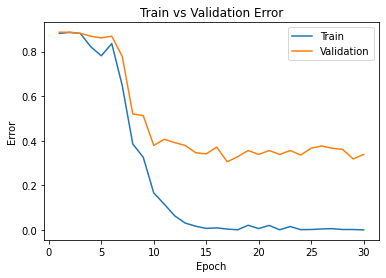

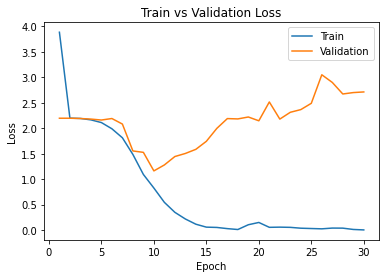

True

In [ ]:
## Changing the learning rate to 0.01
model_a = CNNClassifier()
train(model_a, train_loader, test_loader, num_epochs=30, batch_size=27, learn_rate=0.01)

Training Started...
Epoch 1: Train err: 0.6162790697674418, Train loss: 2.156655469878775 |Validation err: 0.6262626262626263, Validation loss: 1.7395352681477865
Epoch 2: Train err: 0.4094247246022032, Train loss: 1.463434971746851 |Validation err: 0.43686868686868685, Validation loss: 1.250795849164327
Epoch 3: Train err: 0.2711138310893513, Train loss: 1.0670740721655674 |Validation err: 0.30808080808080807, Validation loss: 1.020679235458374
Epoch 4: Train err: 0.21481028151774786, Train loss: 0.8164005978185622 |Validation err: 0.30303030303030304, Validation loss: 0.9840620001157124
Epoch 5: Train err: 0.20501835985312117, Train loss: 0.6647578419231978 |Validation err: 0.32575757575757575, Validation loss: 0.9322472333908081
Epoch 6: Train err: 0.1266829865361077, Train loss: 0.5156981903510015 |Validation err: 0.2904040404040404, Validation loss: 0.965199867884318
Epoch 7: Train err: 0.08078335373317014, Train loss: 0.39805564919456105 |Validation err: 0.2828282828282828, Valid

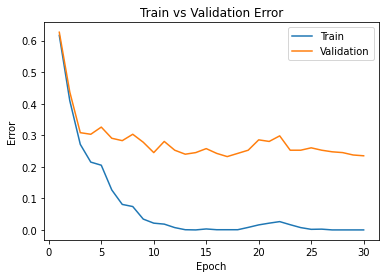

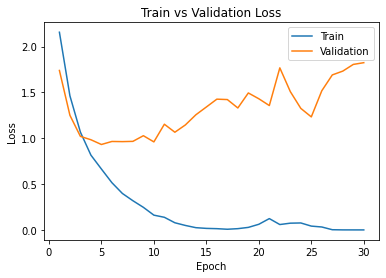

True

In [ ]:
## Changing the batch size to 54
model = CNNClassifier()
train(model, train_loader, test_loader, num_epochs=30, batch_size=54, learn_rate=0.001)

Training Started...
Epoch 1: Train err: 0.5477356181150551, Train loss: 2.029291174450859 |Validation err: 0.5757575757575758, Validation loss: 1.4680148283640544
Epoch 2: Train err: 0.2747858017135863, Train loss: 1.2231895464365599 |Validation err: 0.30303030303030304, Validation loss: 1.0561659574508666
Epoch 3: Train err: 0.22643818849449204, Train loss: 0.9107245309431045 |Validation err: 0.2803030303030303, Validation loss: 0.9181120673815409
Epoch 4: Train err: 0.19216646266829865, Train loss: 0.7116718067497504 |Validation err: 0.3207070707070707, Validation loss: 0.9530541658401489
Epoch 5: Train err: 0.10954712362301101, Train loss: 0.5467533378816042 |Validation err: 0.26515151515151514, Validation loss: 0.8457394520441691
Epoch 6: Train err: 0.05079559363525092, Train loss: 0.36829600153399294 |Validation err: 0.22474747474747475, Validation loss: 0.8602434118588765
Epoch 7: Train err: 0.023255813953488372, Train loss: 0.22362572711999298 |Validation err: 0.2196969696969697

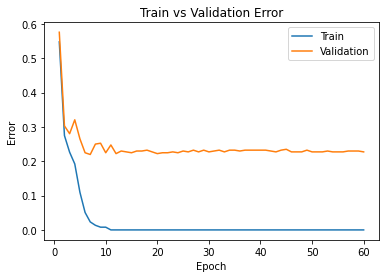

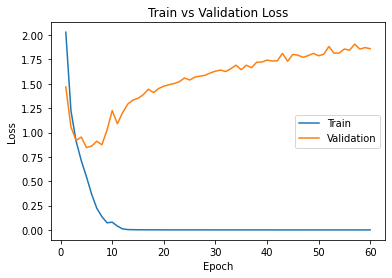

True

In [ ]:
## Changing the num epochs to 60
model_b = CNNClassifier()
train(model_b , train_loader, test_loader, num_epochs=60, batch_size=27, learn_rate=0.001)

Training Started...
Epoch 1: Train err: 0.8200734394124847, Train loss: 2.245188103347528 |Validation err: 0.8181818181818182, Validation loss: 2.1828348000844318
Epoch 2: Train err: 0.4920440636474908, Train loss: 2.01086733184877 |Validation err: 0.5202020202020202, Validation loss: 1.5261965990066528
Epoch 3: Train err: 0.3078335373317013, Train loss: 1.3293533628104164 |Validation err: 0.32575757575757575, Validation loss: 1.1030086954434712
Epoch 4: Train err: 0.26805385556915545, Train loss: 1.0230396272706204 |Validation err: 0.30303030303030304, Validation loss: 0.9827674786249797
Epoch 5: Train err: 0.24112607099143207, Train loss: 0.8967079554424912 |Validation err: 0.29797979797979796, Validation loss: 0.91892569065094
Epoch 6: Train err: 0.21481028151774786, Train loss: 0.7786020387391575 |Validation err: 0.31313131313131315, Validation loss: 0.9731648842493693
Epoch 7: Train err: 0.19155446756425948, Train loss: 0.7003340872584797 |Validation err: 0.29292929292929293, Vali

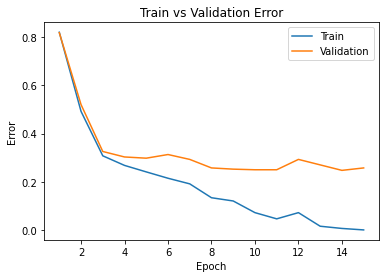

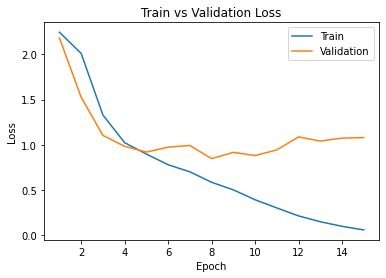

True

In [ ]:
## Changing the num epochs to 15
model_c = CNNClassifier()
train(model_c, train_loader, test_loader, num_epochs=15, batch_size=27, learn_rate=0.001)

### Part (c) - 2 pt
Choose the best model out of all the ones that you have trained. Justify your choice.

The best of the models was model_c with epochs=15, batch_size=27, and learn_rate=0.001. This model had both the validation error and loss begin to plateau after the 8th epoch. 

### Part (d) - 2 pt
Report the test accuracy of your best model. You should only do this step once and prior to this step you should have only used the training and validation data.

In [ ]:
model_path = get_model_name(model_c.name, batch_size=27, learn_rate=0.001, epoch=29)
state = torch.load(model_path)
model_c.load_state_dict(state)

criterion = nn.CrossEntropyLoss()
test_err = get_error(model_c, test_loader)
print(test_err)


0.22727272727272727


### 4. Transfer Learning [15 pt]
For many image classification tasks, it is generally not a good idea to train a very large deep neural network
model from scratch due to the enormous compute requirements and lack of sufficient amounts of training
data.

One of the better options is to try using an existing model that performs a similar task to the one you need
to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed **Transfer
Learning**. In this assignment, we will use Transfer Learning to extract features from the hand gesture
images. Then, train a smaller network to use these features as input and classify the hand gestures.

As you have learned from the CNN lecture, convolution layers extract various features from the images which
get utilized by the fully connected layers for correct classification. AlexNet architecture played a pivotal
role in establishing Deep Neural Nets as a go-to tool for image classification problems and we will use an
ImageNet pre-trained AlexNet model to extract features in this assignment.

### Part (a) - 5 pt
Here is the code to load the AlexNet network, with pretrained weights. When you first run the code, PyTorch
will download the pretrained weights from the internet.

In [ ]:
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-4df8aa71.pth


The alexnet model is split up into two components: *alexnet.features* and *alexnet.classifier*. The
first neural network component, *alexnet.features*, is used to compute convolutional features, which are
taken as input in *alexnet.classifier*.

The neural network alexnet.features expects an image tensor of shape Nx3x224x224 as input and it will
output a tensor of shape Nx256x6x6 . (N = batch size).

Compute the AlexNet features for each of your training, validation, and test data. Here is an example code
snippet showing how you can compute the AlexNet features for some images (your actual code might be
different):

In [ ]:
# img = ... a PyTorch tensor with shape [N,3,224,224] containing hand images ...
features = alexnet.features(img)

**Save the computed features**. You will be using these features as input to your neural network in Part
(b), and you do not want to re-compute the features every time. Instead, run *alexnet.features* once for
each image, and save the result.

In [ ]:
import os
import torchvision.models
alexnet = torchvision.models.alexnet(pretrained=True)

master_path = '/content/drive/My Drive/EngSci Year3/APS360/Labs/Lab 3/'

batch_size = 1 
num_workers = 1

transform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])

# assumes three folders with 70% training, 15% validation and 15% testing samples
train_dataset = torchvision.datasets.ImageFolder(master_path + 'Lab_3b_Gesture_Dataset_Training', transform=transform)
val_dataset = torchvision.datasets.ImageFolder(master_path + 'Lab_3b_Gesture_Dataset_Validation', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(master_path + 'Lab_3b_Gesture_Dataset_Testing', transform=transform)


train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)


classes = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']

master_path = '/content/drive/My Drive/EngSci Year3/APS360/Labs/Lab 3/Features_Training'
# save features as tensors
n = 0
for img, label in train_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = master_path + '/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1

master_path = '/content/drive/My Drive/EngSci Year3/APS360/Labs/Lab 3/Features_Validation'
# save features as tensors
n = 0
for img, label in val_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = master_path + '/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1

master_path = '/content/drive/My Drive/EngSci Year3/APS360/Labs/Lab 3/Features_Testing'
# save features as tensors
n = 0
for img, label in test_loader:
  features = alexnet.features(img)
  features_tensor = torch.from_numpy(features.detach().numpy())

  folder_name = master_path + '/' + str(classes[label])
  if not os.path.isdir(folder_name):
    os.mkdir(folder_name)
  torch.save(features_tensor.squeeze(0), folder_name + '/' + str(n) + '.tensor')
  n += 1


# load features from drive
master_path = '/content/drive/My Drive/EngSci Year3/APS360/Labs/Lab 3/Features'
dataset_train = torchvision.datasets.DatasetFolder(master_path + '_Training', loader=torch.load, extensions=('.tensor'))
dataset_val = torchvision.datasets.DatasetFolder(master_path + '_Validation', loader=torch.load, extensions=('.tensor'))
dataset_test = torchvision.datasets.DatasetFolder(master_path + '_Testing', loader=torch.load, extensions=('.tensor'))

batch_size = 32
num_workers = 1

feature_loader_train = torch.utils.data.DataLoader(dataset_train, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
feature_loader_val = torch.utils.data.DataLoader(dataset_val, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)
feature_loader_test = torch.utils.data.DataLoader(dataset_test, batch_size=batch_size, 
                                           num_workers=num_workers, shuffle=True)

Preparing Train Set
Preparing Val Set
Preparing Test Set
torch.Size([32, 256, 6, 6])
torch.Size([32])


### Part (b) - 3 pt
Build a convolutional neural network model that takes as input these AlexNet features, and makes a
prediction. Your model should be a subclass of nn.Module.

Explain your choice of neural network architecture: how many layers did you choose? What types of layers
did you use: fully-connected or convolutional? What about other decisions like pooling layers, activation
functions, number of channels / hidden units in each layer?

Here is an example of how your model may be called:

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt # for plotting
import torch.optim as optim #for gradient descent

class AlexNetCNN(nn.Module):
    def __init__(self):
        super(AlexNetCNN, self).__init__()
        self.layer1 = nn.Linear(256 * 6 * 6 * 32, 30)
        self.layer2 = nn.Linear(30, 9)

    def forward(self, img):
        flattened = img.view(-1, 256 * 6 * 6 * 32)
        activation1 = self.layer1(flattened)
        activation1 = F.relu(activation1)
        activation2 = self.layer2(activation1)
        return activation2

# I used a similar structure to the CNN from earlier in this lab except with the AlexNet

### Part (c) - 5 pt
Train your new network, including any hyperparameter tuning. Plot and submit the training curve of your
best model only.

Note: Depending on how you are caching (saving) your AlexNet features, PyTorch might still be tracking
updates to the **AlexNet weights**, which we are not tuning. One workaround is to convert your AlexNet
feature tensor into a numpy array, and then back into a PyTorch tensor.

In [ ]:
def get_accuracy(model, train=False):
    if train:
        data_loader = feature_loader_train
    else:
        data_loader = feature_loader_test

    correct = 0
    total = 0

    for features, labels in data_loader:
        features = torch.from_numpy(features.detach().numpy())
        
        output = model(features)
        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += features.shape[0]
    return correct / total

def train(model, train_loader, val_loader, batch_size=1, num_epochs=5, learn_rate=0.001):
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learn_rate)

    iters, losses, train_acc, val_acc = [], [], [], []

    n = 0 # the number of iterations
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):

            out = model(imgs)           # forward pass

            print(img.size(), labels.size(), out.size())     

            loss = criterion(out, labels) # compute the total loss
            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # save the current training information
            iters.append(n)
            losses.append(float(loss)/batch_size)             # compute *average* loss
            train_acc.append(get_accuracy(model, train=True)) # compute training accuracy 
            val_acc.append(get_accuracy(model, train=False))  # compute validation accuracy
            n += 1

    plt.title("Training Curve")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))


In [ ]:
alex_model = AlexNetCNN()
train(alex_model, feature_loader_train, feature_loader_val, batch_size=32, num_epochs=1)

# I'm getting the error below that the input batch_sisze does not match the target batch_size, 
# but I think the rest of the code is all fine, the next few parts have the code in place, 
# similar to the earlier parts of the lab, so would just need to be run if this were to 
# be sorted out 

torch.Size([1, 3, 224, 224]) torch.Size([32]) torch.Size([1, 9])


ValueError: ignored

### Part (d) - 2 pt
Report the test accuracy of your best model. How does the test accuracy compare to Part 3(d) without transfer learning?

In [ ]:
model_path = get_model_name(alex_model, batch_size=32, learn_rate=0.001, epoch=15)
state = torch.load(model_path)
alex_model.load_state_dict(state)

criterion = nn.CrossEntropyLoss()
test_err = get_error(alex_model, test_loader)

FileNotFoundError: ignored

### 5. Additional Testing [5 pt]
As a final step in testing we will be revisiting the sample images that you had collected and submitted at the start of this lab. These sample images should be untouched and will be used to demonstrate how well your model works at identifying your hand guestures. 

Using the best transfer learning model developed in Part 4. Report the test accuracy on your sample images and how it compares to the test accuracy obtained in Part 4(d)? How well did your model do for the different hand guestures? Provide an explanation for why you think your model performed the way it did?

In [ ]:
model_path = get_model_name(alex_model, batch_size=27, learn_rate=0.001, epoch=29)
state = torch.load(model_path)
alex_model.load_state_dict(state)

criterion = nn.CrossEntropyLoss()
test_err = get_error(alex_model, test_loader)
print(test_err)

FileNotFoundError: ignored